## Importing, cleaning and wrangling

In [2]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
# import data with a context manager
with open("data_beta.csv") as fp:
    df = pd.read_csv(fp) 

    names = df['last_name'].tolist()
    
    # Drop unnecessary columns from df
    dropcol = ['first_name', 'last_name', 'google_email', 'smarthalo_email', 'accessory_channels', 'submitted_date', 'token']
    df.drop(columns= dropcol, inplace= True)
    
    # convert to categorical data in the df
    catcol = ["age", "gender", "platform", "income", "experience", "rides_per_week", "num_bikes_owned", "bike_cost", "location", "environment", 'accessory_factor', 'smarthalo_versions','crowdfunded_smarthalo' ]
    for col in catcol:
        df[col] = df[col].astype('category')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 20 columns):
age                      145 non-null category
gender                   145 non-null category
platform                 145 non-null category
income                   145 non-null category
experience               145 non-null category
rides_per_week           145 non-null category
bike_type                145 non-null object
num_bikes_owned          145 non-null category
bike_cost                145 non-null category
location                 145 non-null category
environment              145 non-null category
companions               145 non-null object
conditions               145 non-null object
activities               145 non-null object
reasons_to_bike          145 non-null object
reasons_to_not_bike      145 non-null object
reason_for_smarthalo     145 non-null object
smarthalo_versions       145 non-null category
crowdfunded_smarthalo    145 non-null category
accessory_factor

In [5]:
for i in catcol:
    print(df[i].value_counts(dropna=False), '\n')

35-44 years    49
55+ years      32
45-54 years    31
25-34 years    30
0-25 years      3
Name: age, dtype: int64 

Male                 126
Female                14
Non-binary             4
Prefer not to say      1
Name: gender, dtype: int64 

iOS        85
Android    60
Name: platform, dtype: int64 

80,000+ / year            51
40,000 - 79,000 / year    45
Prefer not to say         26
0 - 39,999 / year         23
Name: income, dtype: int64 

8     50
7     33
9     29
10    17
6     11
5      4
4      1
Name: experience, dtype: int64 

3 or more times a week    105
1-2 times a week           28
Less than once a week      12
Name: rides_per_week, dtype: int64 

2     56
1     52
3+    37
Name: num_bikes_owned, dtype: int64 

500 - 1000       45
1000 - 2000      43
2000 - 4000      29
100 - 500        14
4000+            13
Less than 100     1
Name: bike_cost, dtype: int64 

United States     46
Canada            28
Netherlands       15
France            13
Germany           13
United

## Exploring ML as analysis tool

### Unsupervized learning in Python Chap3 p. 33
scipy.sparse.csr_matrix

In [6]:
to_sparse = ['bike_type', 'companions', 'conditions', 'activities', 'reasons_to_bike', 'reasons_to_not_bike', 'reason_for_smarthalo']

print('Number of unique combinaison of answer for each questions', '\n')
for i in to_sparse:
    print('{}:  '.format(i.capitalize()), df[i].nunique())

Number of unique combinaison of answer for each questions 

Bike_type:   65
Companions:   14
Conditions:   32
Activities:   115
Reasons_to_bike:   127
Reasons_to_not_bike:   85
Reason_for_smarthalo:   97


### NLP tokenization & sklearn CountVectorizer() 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer: vec
vec = CountVectorizer(tokenizer=lambda x: x.split(', '))  # Object to convert in matrix of token counts 

# Fit to the data
for i in to_sparse:
    vec.fit(df[i]) # Convert df.bike_type to matrix of token
    print(vec.get_feature_names(), '\n')

#Archives
# TOKENS = '(?:[a-zA-Z1-9/-]|\s)' # Take only strings between ',' as token but, lamba function x.split(', ') works better   
# print("There are {} tokens in the dataset".format(len(vec.get_feature_names())))

['all road', 'bike share bike', 'brompton', 'brompton folding ', 'cargo bike', 'cruiser / city bike', 'e-bike', 'faltrad', 'fat', 'fat bike', 'foldable', 'folding', 'gravel bike', 'hybrid bike', 'mountain bike', 'recumbent', 'recumbent trike', 'road bike', 'single-speed bike', 'speed pedelec (45km/h e-bike)', 'time-trial race bike', 'touring', 'touring bike'] 

['i bike alone', 'with a riding pack', 'with family and friends', 'with young children'] 

['hot/humid', 'night', 'rain', 'snow/ice', 'temperate'] 

['chores / errands', 'commuting', 'fitness', 'mountain biking', 'pleasure rides', 'racing', 'teaching', 'touring', 'transportation', 'work'] 

['endurance training and relaxation', 'i have friends/family who also bike', 'i want to be healthy', 'i want to reduce my environmental impact', 'i want to set a good example for my kids', 'it energizes me', 'it enhances my calm', 'it’s a unique way to see the world', 'it’s cheaper', 'it’s faster', 'it’s more convenient', 'it’s more fun', 'it

In [8]:
# {'col_to_parse': {'value_to_replace': 'replace_with_value'}}
replace_val = {'bike_type': {'gravel bike': 'all road', 'Brompton': 'foldable', 'Brompton folding ': 'foldable', 'folding': 'foldable', 'FALTRAD': 'foldable', 'fat': 'fat bike', 'recumbent trike': 'recumbent', 'speed pedelec (45km/h e-bike)': 'e-bike', 'time-trial race bike': 'road bike', 'touring': 'touring bike'}}
df.bike_type.replace(replace_val, inplace=True)

In [9]:
vec.fit(df['bike_type'])
vec.get_feature_names()

['all road',
 'bike share bike',
 'brompton',
 'brompton folding ',
 'cargo bike',
 'cruiser / city bike',
 'e-bike',
 'faltrad',
 'fat',
 'fat bike',
 'foldable',
 'folding',
 'gravel bike',
 'hybrid bike',
 'mountain bike',
 'recumbent',
 'recumbent trike',
 'road bike',
 'single-speed bike',
 'speed pedelec (45km/h e-bike)',
 'time-trial race bike',
 'touring',
 'touring bike']

In [10]:
df_text = df[to_sparse].apply(lambda x: ", ".join(x), axis=1)
df_text.head()

0    Hybrid bike, I bike alone, Hot/Humid, Night, T...
1    Road bike, I bike alone, Temperate, Rain, Hot/...
2    Hybrid bike, I bike alone, Temperate, Commutin...
3    Hybrid bike, I bike alone, Night, Temperate, R...
4    Mountain bike, With family and friends, Temper...
dtype: object

In [11]:
# Instantiate the CountVectorizer: vec
vec = CountVectorizer(tokenizer=lambda x: x.split(', '))  # Object to convert in matrix of token counts 

# Fit to the data
X = vec.fit_transform(df_text) # Convert df.bike_type to matrix of token
print("There are {} tokens in the dataset".format(len(vec.get_feature_names())))

There are 82 tokens in the dataset


In [12]:
vec.get_feature_names()

['all road',
 'because i have smarthalo 1 and love it ',
 "because it's cool!",
 'bike share bike',
 'brompton',
 'brompton folding ',
 'cargo bike',
 'chores / errands',
 'commuting',
 'cruiser / city bike',
 'e-bike',
 'endurance training and relaxation',
 'faltrad',
 'fat',
 'fat bike',
 'fitness',
 'foldable',
 'folding',
 'for a press review',
 'gravel bike',
 'hot/humid',
 'hybrid bike',
 'i bike alone',
 "i don't know the way",
 "i don't want to sweat",
 'i feel lazy',
 'i have friends/family who also bike',
 'i have to carry things with me',
 'i want to be healthy',
 'i want to reduce my environmental impact',
 'i want to set a good example for my kids',
 'it energizes me',
 'it enhances my calm',
 'it was a gift',
 'it was a gift. but i bought the new model myself',
 "it wouldn't be fun",
 "it's not safe for me",
 "it's not safe for my bike",
 "it's too dark",
 'it’s a unique way to see the world',
 'it’s cheaper',
 'it’s faster',
 'it’s more convenient',
 'it’s more fun',
 'i

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(vec, random_state=456)
df_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

### Unsupervized learning in Python Chap1 p. 31
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

### Unsupervized learning in Python Chap4 p. 7
NMF with word frequency array

In [14]:
from sklearn.decomposition import NMF

matrix = X.toarray()
model = NMF(n_components=5)
model.fit(matrix)
nmf_features = model.transform(matrix)
'''
POST: 
    matrix is a (# users) x (# unique feature combination) matrix 
        - you can think of it as ... (ask Jo)? 
        
    nmf_features is a (# users) x (# components) matrix
        - you can think of it as each user's affinity towards each component
'''

print(nmf_features.shape)

(145, 5)


In [34]:
#put nmf_features data into a DataFrame so we can reference it by the names each user has
df_nmf = pd.DataFrame(nmf_features,index=names)

#set column names
col_names = []
for x in range(0, model.components_.shape[0]):
    col_names.append("Persona {} fit".format(x))

df_nmf.columns = col_names
    
#to see a single user's personas
print(df_nmf.loc['Denis'])

#to see multi-users
df_nmf.head()

Persona 0 fit    0.324252
Persona 1 fit    0.000000
Persona 2 fit    0.457695
Persona 3 fit    0.032516
Persona 4 fit    0.266342
Name: Denis, dtype: float64


,Persona 0 fit,Persona 1 fit,Persona 2 fit,Persona 3 fit,Persona 4 fit
Haywood,0.576241,0.400315,0.000000,0.378666,0.000000
provot,0.484969,0.000000,0.231475,0.373865,0.005636
Gray,0.094388,0.690324,0.129694,0.378387,0.164724
Glenn,0.136949,0.459253,0.058949,0.366075,0.573129
Hammocks,0.000000,0.191162,0.206325,0.000000,0.580798


In [16]:
#get names for each persona
total_num_users = len(names)

#initalize the lists we'll use
persona_names=[]
no_persona_names=[]
for x in range(0, model.components_.shape[0]):
    persona_names.append([])

for name,persona_affinities in df_nmf.iterrows():
    #print(persona_affinities)
    is_sorted=False
    for x in range(0,persona_affinities.shape[0]):
        if persona_affinities[x] >= 0.3:
            persona_names[x].append(name)
            is_sorted=True
            
    if not is_sorted:
        no_persona_names.append(name)

for x in range(0, model.components_.shape[0]):
    num_users = len(persona_names[x])
    percent_users = round(num_users/total_num_users*100,1)
    print("There are {}({}%) people in persona {}".format(num_users, percent_users, x))

num_no_persona = len(no_persona_names)
percent_no_persona = round(num_no_persona/total_num_users*100,1)
print("{}({}%) have not been put into a persona".format(num_no_persona, percent_no_persona))
            

There are 70(48.3%) people in persona 0
There are 60(41.4%) people in persona 1
There are 33(22.8%) people in persona 2
There are 50(34.5%) people in persona 3
There are 63(43.4%) people in persona 4
5(3.4%) have not been put into a persona


(0, 50)

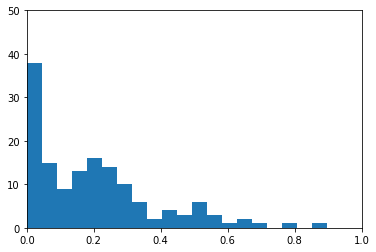

(5, 82)

Persona 0
1.606687655262626	it’s more convenient
1.4942237309593616	rain
1.4137072047059374	it’s faster
1.3636241620329737	night
1.3215357462711668	it’s more reliable
1.2787851954440421	hot/humid
1.1772437856019415	commuting
1.1346846059871556	it’s cheaper
1.090250912532918	i bike alone
1.0335629229639225	temperate


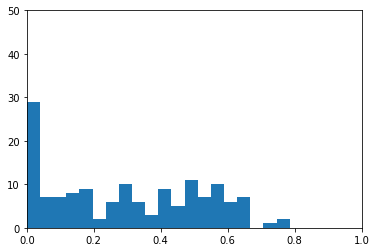




Persona 1
1.6060239569003418	fitness
1.2183317227507948	pleasure rides
1.20834016021302	chores / errands
1.2069941110332865	it’s my hobby/interest
0.9505382637745258	it's not safe for my bike
0.780481029364693	commuting
0.6961169223408172	to help keep my bike safe
0.6943505545317885	i want to reduce my environmental impact
0.6629401277160333	it’s cheaper
0.619214543265208	it's not safe for me


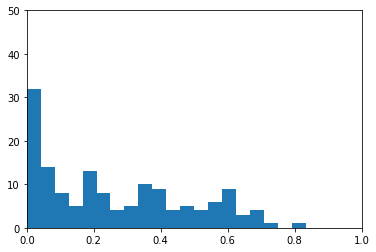




Persona 2
1.4140523646621628	touring
1.3570889859428463	it’s my hobby/interest
1.2408851055569816	work
1.0255799360788609	because it's cool!
1.007477497714768	pleasure rides
0.9076950697758308	to help me keep track of my fitness goals
0.9025453805239222	it’s more fun
0.8180682018467316	mountain bike
0.7992732953741825	road bike
0.7698011156769456	snow/ice


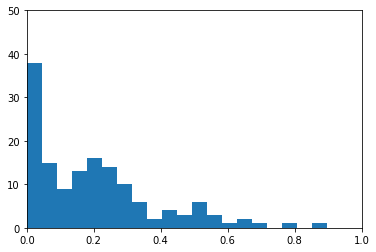




Persona 3
3.050554473763691	safest routes)
3.050554473763691	to help me stay safe (nightlight
1.030162459773895	to help keep my bike safe
0.9285982834070089	because it's cool!
0.8729563565706641	i want to reduce my environmental impact
0.8340698558309574	i have to carry things with me
0.7896107907647544	to help me navigate
0.752653640329814	road bike
0.7435707817088368	i bike alone
0.7040225683859745	hybrid bike


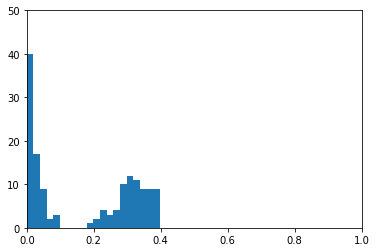




Persona 4
1.614626579286594	the weather doesn't suit me
1.043605919924171	temperate
0.9929848912158052	to help me navigate
0.8234443806249837	i want to be healthy
0.7894079018144453	i bike alone
0.7526550871400342	so i don't have to look at my phone while riding
0.573818559124928	transportation
0.5412147622114287	cruiser / city bike
0.5078269769021597	commuting
0.4726744494270258	it's not safe for me


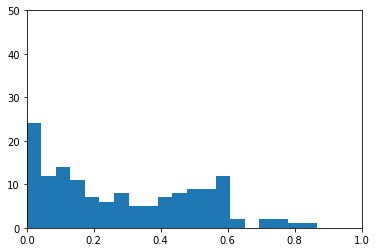

In [119]:
'''
This section extracts the components from the NMF model, allowing us to describe the component in
    a more "human readable" way
'''

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vec.get_feature_names())

# Print the shape of the DataFrame
print(components_df.shape)

for x in range(0,components_df.shape[0]):
    print("\nPersona "+str(x))
    print("==========")
    component = components_df.iloc[x,:]
    for y,z in component.nlargest(10).items():
        #this output specifically for https://www.wordclouds.com/
        #import math
        #print(str(math.trunc(z*10000000))+" "+str(y.replace(" ", "~")))
        print("{}\t{}".format(z, y))
        
        
    #print(component.nlargest(50))
    plt.hist(df_nmf.iloc[:,x], bins=20)
    plt.ylim(0,50)
    plt.xlim(0,1)
    plt.show()
    print("\n")

In [18]:
components_df.head()

,all road,because i have smarthalo 1 and love it,because it's cool!,bike share bike,brompton,brompton folding,cargo bike,chores / errands,commuting,cruiser / city bike,...,to support a new company that came up with a revolutionary design,touring,touring bike,transportation,using the latest gadget is also hobby,why not?,with a riding pack,with family and friends,with young children,work
0,0.000000,0.016718,0.231889,0.192698,0.016573,0.011061,0.248238,0.629304,1.177147,0.315755,...,0.027470,0.054414,0.025923,0.956899,0.000000,0.010641,0.000000,0.000000,0.266654,0.597996
1,0.000000,0.000000,0.000000,0.010574,0.000000,0.015174,0.000000,1.208459,0.780557,0.000000,...,0.000000,0.000000,0.005043,0.383152,0.000000,0.016264,0.240507,0.568690,0.000000,0.000000
2,0.057989,0.000000,1.025547,0.000000,0.000000,0.000000,0.144049,0.000000,0.000000,0.000000,...,0.007281,1.414010,0.006226,0.303758,0.081578,0.000000,0.101804,0.443871,0.012124,1.240853
3,0.000000,0.034064,0.927957,0.000000,0.023676,0.014016,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.430729,0.000000,0.495302,0.000000,0.014729,0.013199,0.000000,0.000000,0.207735
4,0.000000,0.000000,0.400555,0.056830,0.000000,0.000000,0.000000,0.000000,0.507668,0.541046,...,0.000000,0.105238,0.000000,0.573641,0.000000,0.000000,0.000000,0.289546,0.175477,0.000000


In [19]:
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
dfpersona = pd.DataFrame(norm_features, index=names)

# Select the row corresponding to 'Cristiano Ronaldo': article
persona = dfpersona.loc['Haywood']

# Compute the dot products: similarities
similarities = dfpersona.dot(persona)

# Display those with the largest cosine similarity
print(similarities.nlargest(40))

Haywood          1.000000
Bromund          0.992531
White            0.986067
Emmons           0.970302
Pearson          0.960032
Burgess          0.958179
Spinelli         0.951245
Solow            0.948663
DuBois           0.948416
Rathjens         0.948193
Schiske          0.945138
Lortie           0.939672
Lopez            0.901985
Nelson           0.899421
Stoll            0.898499
Bhattacharyya    0.882984
B                0.869170
Franco           0.864593
W                0.863611
Ellens           0.862532
Piolain          0.862047
Brown            0.858875
Thiemann         0.842381
Moens            0.842303
Rosenthal        0.834704
Mrstik           0.834425
Reinecke         0.830849
Hurkmans         0.830277
Peich            0.829778
Sullivan         0.826468
Ranger           0.826085
Cunningham       0.826038
McCord           0.825698
Beal             0.823473
de Wild          0.820962
Hay              0.812920
Bauer            0.812449
Chalasani        0.809792
provot      

In [20]:
norm_personas = normalize(components_df)

dfx = pd.DataFrame(norm_personas)
persona = dfx.loc[0]

similarities = dfpersona.dot(persona)
print(similarities.nlargest(40))

ValueError: matrices are not aligned